## Global modules import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import numpy as np
import random as rnd
import sys
import torch

from sklearn.model_selection import train_test_split
from operator import itemgetter

## Local modules import

In [3]:
sys.path.append('..')

## Loading data

In [4]:
from data_loading import create_word_lists, tidy_sentence_length

In [5]:
with open('../data/corpus_data.json') as json_file:
    data = json.load(json_file)
data = data['records']

## Exploration

Calculate the proportion of badly transcribed german words such that STT transcript consists of multiple words:

In [6]:
num_words = 0
num_splits = 0

for entry in data:

    for word in entry["words"]:
        
        
        humw = word["human_word"]
        sttw = word["stt_word"]

        if "@g" in humw:
            num_words+=1

            if len(sttw.split()) > 1:
                num_splits += 1

print(num_splits, num_words, num_splits/num_words)

219 2251 0.09729009329187029


See baseline score when predicting only English:

In [7]:
import pandas as pd
from mlp import calc_stats
from data_loading import create_word_lists

In [8]:
_, _, word_labels, _, _ = create_word_lists(data)
stt_transcripts   = [entry['stt_transcript'] for entry in data]

In [9]:
len(stt_transcripts)

6723

In [20]:
word_labels = [int(l) for sublist in word_labels for l in sublist]

In [23]:
word_labels_t = torch.tensor(word_labels)
all_english = torch.zeros(len(word_labels))
accuracy, precision, recall, f1 = calc_stats(all_english, word_labels_t)
accuracy, precision, recall, f1

/home/dyco/EPFL/SEMESTAR_1/ML/ml-project-2-machinesoflearning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9700184575876736, 0.0, 0.0, 0.0)

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True

In [32]:
nb_words_per_record = np.array([len(sublist) for sublist in word_labels])

(0.0, 100.0)

<Figure size 640x480 with 0 Axes>

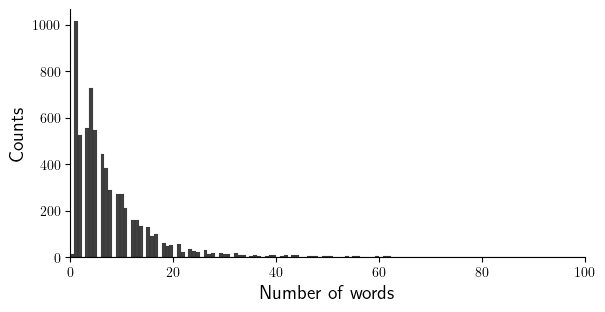

In [41]:
plt.figure()
sns.displot(nb_words_per_record, orientation='horizontal', height=3, aspect=2, color='k')
plt.xlabel("Number of words", size=14)
plt.ylabel("Counts", fontsize=14)
plt.xlim([0,100])

In [23]:
np.median(nb_words_per_record)

5.0

In [24]:
np.max(nb_words_per_record)

472

In [25]:
np.min(nb_words_per_record)

0